In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'customer-clustering:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1324053%2F2204747%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240501%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240501T074825Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D095dead3ff5158e91c52726a06c24f9101e84b0b1b7ec70f82b39fa29fdc7e01b6ba9896f8e82be4c6462e6f396ac20563fed397227050da6f470ab5561097c3700fd4591ca2c1afce3ecbcbd5eb13cf05e4974ba3db900e714d2947621bd6df5fd9b72e977f512659a2af155502e91cd0fdf60b4d745de3d04950a6f0c00b11a282b14f514d2c31a2728f6c9a49b976a1d737d79b0a9360bdb70e7f8eb13402835aec75b9452e07d34efc3925e442caa179d6cfd22fcb6c132c2181c17d5347cdd873f825c0d2f9cfdf791986a61f26be1d599479d1dcec024554e8ed0e82e35f28b3212b646a74427a6a3b03879f9f814abe3653a8168d8716dfce4ab0f5dd'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 26543 bytes downloaded
Downloaded and uncompressed: customer-clustering
Data source import complete.


# <div style="text-align: center; background-color:darkgreen; font-family:Impact; color: white; padding: 20px; line-height: 1;border-radius:20px">Customer Segmentation 🛍</div>

<div style="width:100%;text-align:center">
<img align=middle src = "https://www.eurekafacts.com/wp-content/uploads/2018/10/Market-Segmentation-600px.jpg" width="300px">
</div>

<div style='background-color:#76BA1B;color:white;padding:4px;border-radius:25px;font-family:georgia'>
<h3 style='color:white;font-family:Impact'>&nbsp About Dataset 📑</h3>
</div>

<div style='padding:6px; font-size:16'>
    <p>The dataset consists of information about the purchasing behavior of <b>2,000 individuals</b> from a given area when entering a physical <u>‘FMCG’ store.</u> All data has been collected through <b>the loyalty cards they use at checkout.</b> The data has been preprocessed and there are no missing values. In addition, the volume of the dataset has been <b>restricted and anonymised</b> to protect the <b>privacy</b> of the customers.</p>
    <ul>
        <li><mark><b>Sex:</b></mark> Biological sex (gender) of a customer
        <br/>&nbsp 0: male, 1: female
        </li>
        <li><mark><b>Marital status:</b></mark> Marital status of a customer
            <br/>&nbsp 0: single, 1: non-single (divorced/separated/married/widowed)
        </li>
       <li><mark><b>Age:</b></mark> The age of the customer ine years, calculated as current year minus the year of the birth of the customer at the time of creation of the dataset
           <br/>&nbsp 18 Min value, 78 Max value
        </li>
        <li><mark><b>Education:</b></mark> Level of education of the customer
            <br/>&nbsp 0: other/unknown, 1: high school, 2: university, 3: graduate school
        </li>
        <li><mark><b>Income:</b></mark> Self-reported annual income in US dollars of the customer
            <br/>&nbsp 35832 Min value, 309364 Max value
        </li>
        <li><mark><b>Occupation:</b></mark> Category of occupation of the customer
            <br/>&nbsp 0: unemployed/unskilled, 1: skilled employee/official, 2: management/self-employed/highly qualified employee/officer
        </li>
        <li><mark><b>Settlement size:</b></mark> The size of the city that the customer
            <br/>&nbsp 0: small city, 1: mid-sized city, 2: big city
        </li>
    </ul>
</div>

<div style='background-color:#76BA1B;color:white;padding:4px;border-radius:25px;font-family:georgia'>
<h3 style='color:white;font-family:Impact'>&nbsp Goal of the Project 🙇‍♀️</h3>
</div>

<div style='padding:6px'>
    <p>The goal of the project is to 📊 <mark>explore</mark> data (EDA Analysis), 👯‍♀️ <mark>perform clustering</mark> using different models, and 🔎 <mark>compare models </mark> to find out best model for customer segmentation. <br/><br/> This analysis can be applied in 👩‍💼 <u><b>marketing</b></u> field to optimize customer targeting. </p>
</div>

<div style='background-color:#76BA1B;color:white;padding:4px;border-radius:25px;font-family:georgia'>
    <h3 style='color:white;font-family:Impact'>&nbsp Table of Contents 🧚</h3>
</div>
<ul style='padding:6px'>
    <a href='#1'><b>1. Import Libraries 📚</b><br/></a>
    <a href='#2'><b>2. Exploratory Data Analysis 📊</b></a>
    <ul>
        <a href='#2.1'><b>2.1 Univariate Analysis</b><br/></a>
            <ul>
                <a href='#2.1.1'>2.1.1 Distribution of Categorical Variables<br/></a>
                <a href='#2.1.2'>2.1.2 Distribution of Continuous Variables<br></a>
            </ul>
        <a href='#2.2'><b>2.2 Gender Analysis<br/></b></a>
            <ul>
                <a href='#2.2.1'>2.2.1 Gender and Marital Status<br/></a>
                <a href='#2.2.2'>2.2.2 Gender and Education<br/></a>
                <a href='#2.2.3'>2.2.3 Gender, Marital Status, and Age<br></a>
            </ul>
        <a href='#2.3'><b>2.3 Income Analysis<br/></b></a>
    </ul>
    <a href='#3'><b>3. Cluster Modelling 👯‍♀️</b></a>
    <ul>
        <a href='#3.1'><b>3.1 General Variables and Functions Needed for Modelling</b><br/></a>
        <a href='#3.2'><b>3.2 Normality Test for Age and Income Distribution</b><br/></a>
        <a href='#3.3'><b>3.3 Preprocess Data</b><br/></a>
        <a href='#3.4'><b>3.4 Find KMeans Best Parameters</b><br/></a>
        <a href='#3.5'><b>3.5 Find MeanShift Best Parameters</b><br/></a>
        <a href='#3.6'><b>3.6 Find Gaussian Mixture Best Parameters</b><br/></a>
    </ul>
   <a href='#4'><b>4. Model Evaluation 🔎</b></a>
   <a href='#5'><b>5. Further Analysis 👀<br/></b></a>
    <ul>
        <a href='#5.1'><b>5.1 General Functions Needed for Further Analysis</b><br/></a>
        <a href='#5.2'><b>5.2 Evluate Each Cluster</b><br/></a>
        <ul>
            <a href='#5.2.1'>5.2.1 Cluster 0<br/></a>
            <a href='#5.2.2'>5.2.2 Cluster 1<br/></a>
            <a href='#5.2.3'>5.2.3 Cluster 2<br/></a>
            <a href='#5.2.4'>5.2.4 Cluster 3<br/></a>
            <a href='#5.2.5'>5.2.5 Cluster 4<br/></a>
            <a href='#5.2.6'>5.2.6 Cluster 5<br/></a>
            <a href='#5.2.7'>5.2.7 Cluster 6<br/></a>
            <a href='#5.2.8'>5.2.8 Conclusion on Further Analysis<br/></a>
        </ul>
    </ul>
</ul>

<a id="1"></a>
# <div style="text-align: center; background-color: #4C9A2A; font-family:Impact; color: white; padding: 14px; line-height: 1;border-radius:20px">1. Import Libraries 📚</div>

In [2]:
## Remove Warnings ##
import warnings
warnings.filterwarnings('ignore')

## Data ##
import pandas as pd
import numpy as np
import math

## Visualization ##
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.cm as cm

## Preprocessing ##
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler

## Cluster Modelling ##
from scipy import stats
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import estimate_bandwidth
from sklearn.cluster import MeanShift
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

In [3]:
df = pd.read_csv('/kaggle/input/customer-clustering/segmentation data.csv')
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


There are <b>7</b> columns in total.

In [5]:
df.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [6]:
df.drop('ID', axis=1, inplace=True)

<a id="2"></a>
# <div style="text-align: center; background-color: #4C9A2A; font-family:Impact; color: white; padding: 14px; line-height: 1;border-radius:20px">2. Exploratory Data Analysis 📊</div>

Since all the categorical variables (sex, marital status, education, occupation, and settlement size) are in integer type, <mark><b>create_temp_df</b></mark> function will label categorical variables to <b>improve comprehensibility</b> of data visualizations.

In [9]:
def create_temp_df(temp_df):
    temp_df = temp_df.copy()
    temp_df['Sex'] = temp_df['Sex'].replace(0, 'Male')
    temp_df['Sex'] = temp_df['Sex'].replace(1, 'Female')
    temp_df['Marital status'] = temp_df['Marital status'].replace(0, 'Single')
    temp_df['Marital status'] = temp_df['Marital status'].replace(1, 'Non-Single')
    temp_df['Education'] = temp_df['Education'].replace(0, 'Other/Unknown')
    temp_df['Education'] = temp_df['Education'].replace(1, 'High School')
    temp_df['Education'] = temp_df['Education'].replace(2, 'University')
    temp_df['Education'] = temp_df['Education'].replace(3, 'Graduate School')
    temp_df['Occupation'] = temp_df['Occupation'].replace(0, 'Unskilled Employee')
    temp_df['Occupation'] = temp_df['Occupation'].replace(1, 'Skilled Employee')
    temp_df['Occupation'] = temp_df['Occupation'].replace(2, 'Highly Qualified Employee')
    temp_df['Settlement size'] = temp_df['Settlement size'].replace(0, 'Small City')
    temp_df['Settlement size'] = temp_df['Settlement size'].replace(1, 'Mid-Sized City')
    temp_df['Settlement size'] = temp_df['Settlement size'].replace(2, 'Big City')
    return temp_df

In [10]:
temp_df = create_temp_df(df)

<div id='2.1' style='background-color:#76BA1B;text-align:center;padding:4px;border-radius:25px'>
    <h3 style='color:white;font-family:Impact'>2.1 Univariate Analysis</h3>
</div>

In this section, I will explore distribution of <b>categorical variables</b> and distribution of <b>continuous variables</b>

<div id='2.1.1' style='background-color:#6EBD6D;padding:2px;border-radius:25px'>
    <h4 style='font-family:Impact; color:white'>&nbsp 2.1.1 Distribution of Categorical Variables</h4>
</div>

In [11]:
row_n = 3
col_n = 2

sex_counts = temp_df['Sex'].value_counts().sort_values(ascending=True)
marital_counts = temp_df['Marital status'].value_counts().sort_values(ascending=True)
education_counts = temp_df['Education'].value_counts().sort_values(ascending=True)
occupation_counts = temp_df['Occupation'].value_counts().sort_values(ascending=True)
settlement_counts = temp_df['Settlement size'].value_counts().sort_values(ascending=True)
categorical_lst = [sex_counts, marital_counts, education_counts, occupation_counts, settlement_counts]
categorical_labels = ['Sex', 'Marital Status', 'Education', 'Occupation', 'Settlement Size']

fig = make_subplots(rows=row_n, cols=col_n)

for i, col in enumerate(categorical_labels):
    fig.add_trace(
        go.Bar(
            x=categorical_lst[i].index.astype('str'),
            y=categorical_lst[i].values,
            name=col,
            text=np.round(categorical_lst[i].values,3),
            textposition='inside',
            marker_color=px.colors.sequential.Emrld,
            textfont=dict(size=10)),
        row=int(i/col_n)+1, col=int(i%col_n)+1
        )

fig.update_layout(
    height=800,
    title_text="Categorical Variable Distribution",
    template='simple_white')
fig.update_traces(marker_line_color='black',
                  marker_line_width=1.5,
                  opacity=0.8)
fig.show()

Following characteristics are relatively <mark><b>more</b></mark> distributed in this dataset:<br>
- male
- single
- education level at high school
- skilled employee
- residence in small city

<div id='2.1.2' style='background-color:#6EBD6D;padding:2px;border-radius:25px'>
    <h4 style='font-family:Impact; color:white'>&nbsp 2.1.2 Distribution of Continuous Variables</h4>
</div>

In [12]:
fig = make_subplots(rows=2, cols=2)

fig.add_trace(
    go.Histogram(x=df['Age'], name='Age Histogram', marker_color='darkgreen'),
    row=1, col=1
)

fig.add_trace(
    go.Box(y=df['Age'], name='Age Box Plot', marker_color='darkgreen'),
    row=1, col=2
)

fig.add_trace(
    go.Histogram(x=df['Income'], name='Income Histogram', marker_color='seagreen'),
    row=2, col=1
)

fig.add_trace(
    go.Box(y=df['Income'], name='Income Box Plot', marker_color='seagreen'),
    row=2, col=2
)

fig.update_layout(
    title_text='Continuous Variable Distribution',
    template='simple_white')
fig.update_traces(
    marker_line_color='black',
    marker_line_width=1.5,
    opacity=0.8)
fig.show()


Age is <mark><b>strongly right</b></mark> skewed, mostly aged around <b>26-27 (mode)</b>. <br/>
Income is <mark><b>slightly right</b></mark> skewed, mostly earning around <b>100k-126k</b> in USD.

<div id='2.2' style='background-color:#76BA1B;text-align:center;padding:4px;border-radius:25px'>
    <h3 style='color:white;font-family:Impact'>2.2 Multivariate Analysis</h3>
</div>

In this section, I will analyze relationship between <b>gender</b> and other variables.

<div id='2.2.1' style='background-color:#6EBD6D;padding:2px;border-radius:25px'>
    <h4 style='font-family:Impact; color:white'>&nbsp 2.2.1 Gender and Marital Status</h4>
</div>

In [13]:
marital_colors=['darkgreen', '#ACDF87']

gender_by_marital = pd.DataFrame(df.groupby('Sex')['Marital status'].value_counts())
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=['Single', 'Non-Single'],
                     values=[int(gender_by_marital.loc[0,0]), int(gender_by_marital.loc[0,1])],
                     textinfo='percent+value+label',
                     marker_colors=marital_colors,
                     name="Male"),
              1, 1)
fig.add_trace(go.Pie(labels=['Single', 'Non-Single'],
                     values=[int(gender_by_marital.loc[1,0]), int(gender_by_marital.loc[1,1])],
                     textinfo='percent+value+label',
                     marker_colors=marital_colors,
                     name="Female"),
              1, 2)

fig.update_traces(hole=.3, hoverinfo="label+percent+name",
                  marker_line_color='black',
                  marker_line_width=1.5,
                  opacity=0.8)
fig.update_layout(
    title_text="Gender and Marital Status Distribution",
    annotations=[dict(text='Male', x=0.18, y=0.5, font_size=20, showarrow=False),
                 dict(text='Female', x=0.84, y=0.5, font_size=20, showarrow=False)])
fig.show()

From the visualizations, I can observe that <b>single males and non-single females</b> tend to visit this mall as there is relatively high proportion of single in male while non-single in female.

<div id='2.2.2' style='background-color:#6EBD6D;padding:2px;border-radius:25px'>
    <h4 style='font-family:Impact; color:white'>&nbsp 2.2.2 Gender and Education</h4>
</div>

In [14]:
education_colors=['#ACDF87', 'darkgreen', 'seagreen', '#68BB59']

gender_by_education = pd.DataFrame(df.groupby('Sex')['Education'].value_counts())
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=['Other/Unknown', 'High School', 'University', 'Graduate School'],
                     values=[int(gender_by_education.loc[0,0]), int(gender_by_education.loc[0,1]),
                            int(gender_by_education.loc[0,2]), int(gender_by_education.loc[0,3])],
                     textinfo='percent+value+label',
                     marker_colors=education_colors,
                     name="Male"),
              1, 1)
fig.add_trace(go.Pie(labels=['Other/Unknown', 'High School', 'University', 'Graduate School'],
                     values=[int(gender_by_education.loc[1,0]), int(gender_by_education.loc[1,1]),
                            int(gender_by_education.loc[1,2]), int(gender_by_education.loc[1,3])],
                     textinfo='percent+value+label',
                     marker_colors=education_colors,
                     name="Female"),
              1, 2)

fig.update_traces(hole=.3, hoverinfo="label+percent+name",
                  marker_line_color='black',
                  marker_line_width=1.5,
                  opacity=0.8)
fig.update_layout(
    title_text="Gender and Education Distribution",
    annotations=[dict(text='Male', x=0.18, y=0.5, font_size=20, showarrow=False),
                 dict(text='Female', x=0.84, y=0.5, font_size=20, showarrow=False)])
fig.show()

<b>Both males and females</b> mostly have the education level at <b>high school</b> and have <b>similar</b> proportion for education level at university and graduate school. <b>Males</b> have <b>more other/unknown</b> education level than females do.

<div id='2.2.3' style='background-color:#6EBD6D;padding:2px;border-radius:25px'>
    <h4 style='font-family:Impact; color:white'>&nbsp 2.2.3 Gender, Marital Status, and Age</h4>
</div>

In [15]:
fig = px.histogram(temp_df, x='Sex', y='Age',
                 color='Marital status', barmode='group',
                 histfunc='avg', text_auto=True,
                 template='simple_white',
                 title='Gender, Age, and Marital Status Distribution',
                 color_discrete_sequence=['darkgreen', '#ACDF87'])

fig.update_traces(marker_line_color='black',
                  marker_line_width=1.5,
                  opacity=0.8)
fig.show()

<b>Both female and male singles</b> have <b>higher</b> average income than non-single. Overally, males earn <b>more</b> average salaries than females do.

<div id='2.3' style='background-color:#76BA1B;text-align:center;padding:4px;border-radius:25px'>
    <h3 style='color:white;font-family:Impact'>2.3 Income Analysis</h3>
</div>

In [16]:
income_by_sex = temp_df.groupby('Sex')['Income'].mean().sort_values(ascending=True)
income_by_marital = temp_df.groupby('Marital status')['Income'].mean().sort_values(ascending=True)
income_by_age = temp_df.groupby('Age')['Income'].mean()
income_by_education = temp_df.groupby('Education')['Income'].mean().sort_values(ascending=True)
income_by_occupation = temp_df.groupby('Occupation')['Income'].mean().sort_values(ascending=True)
income_by_settlement = temp_df.groupby('Settlement size')['Income'].mean().sort_values(ascending=True)
income_lst = [income_by_sex, income_by_marital, income_by_age, income_by_education, income_by_occupation, income_by_settlement]
income_labels = ['Sex', 'Marital Status', 'Age', 'Education', 'Occupation', 'Settlement Size']

row_n = 3
col_n = 2

fig = make_subplots(rows=row_n, cols=col_n)

for i, col in enumerate(income_labels):
    fig.add_trace(
        go.Bar(
            x=income_lst[i].index.astype('str'),
            y=income_lst[i].values,
            name=col,
            text=np.round(income_lst[i].values,3),
            textposition='inside',
            marker_color=px.colors.sequential.Emrld,
            textfont=dict(size=10)),
        row=int(i/col_n)+1, col=int(i%col_n)+1
        )

fig.update_layout(
    height=800,
    title_text="Bar Chart on Income Analysis",
    template='simple_white')
fig.update_traces(marker_line_color='black',
                  marker_line_width=1.5,
                  opacity=0.8)
fig.show()

People with the following characteristics earn <b>higher</b> average income: <br>
- male
- single
- older
- graduate school
- highly qualified employee
- living in big city

<a id="3"></a>
# <div style="text-align: center; background-color: #4C9A2A; font-family:Impact; color: white; padding: 14px; line-height: 1;border-radius:20px">3. Cluster Modelling 👯‍♀️</div>

In this section, I will perform <mark>KMeans, MeanShift, and Gaussian Mixture</mark> for <b>customer segmentation</b>, which can be effectively used in marketing and sales. <hr/>
- <mark><b>KMeans:</b></mark> centroid-based algorithm (calculate the distance between each data point and a centroid to assign it to a cluster
- <mark><b>MeanShift:</b></mark> centroid-based algorithm (update candidates for centroids to be the mean of the points within a given region (also called bandwidth))
- <mark><b>Gaussian Mixture Model:</b></mark> Gaussian distribution (probabilistic) based algorithm (comprised of expectation and likelihood maximization step (EM-Step))  

<div id='3.1' style='background-color:#76BA1B;text-align:center;padding:4px;border-radius:25px'>
    <h3 style='color:white;font-family:Impact'>3.1 General Variables and Functions Needed for Modelling </h3>
</div>

- Set random_state as 0 for all models to keep consistency
<hr/>
Functions:
- <mark><b>normality_test: </b></mark>This function returns the p-value of distribution normality test. If p-value is less than 0.05, null hypothesis (distribution is normal) is rejected, which means that the distribution is NOT normally distributed.
- <mark><b>power_log_normality_test: </b></mark>This function returns the p-value of power-transformed and log-transformed distribution normality test. If p-value is less than 0.05, null hypothesis (distribution is normal) is rejected, which means that the distribution is NOT normally distributed.
- <mark><b>visualize_silhouette: </b></mark>This function returns the visualizations of silhouette scores with different number of clustering. It can only be used for KMeans and GaussianMixture as MeanShift uses estimate_bandwidth function for hyperparamter tuning. More similar silhouette score for each cluster and higher average silhouette, the better the model's performance is.
- <mark><b>evaluate: </b></mark>This function returns the average silhouette score given the model.

In [17]:
rs_value = 0

In [18]:
def normality_test(feature):
    return stats.normaltest(feature)[1]

In [19]:
def power_log_normality_test(feature):

    # Power Transformation Test
    power_feature = PowerTransformer().fit_transform(feature.to_numpy().reshape(-1,1))
    power_normaltest = normality_test(power_feature.flatten())

    # Log Transformation Test
    log_feature = np.log(feature)
    log_normaltest = normality_test(log_feature)

    return power_normaltest, log_normaltest

In [20]:
def visualize_silhouette(model, cluster_lists, X_features):

    n_cols = len(cluster_lists)

    fig, axs = plt.subplots(figsize=(4*n_cols,4), nrows=1, ncols=n_cols)

    for ind, n_cluster in enumerate(cluster_lists):

        if (model=='GMM'):
            cluster =  GaussianMixture(n_components=n_cluster, random_state=0)
            cluster_labels = cluster.fit_predict(X_features)
        elif (model=='KMeans'):
            cluster = KMeans(n_clusters=n_cluster, n_init=10, max_iter=500, random_state=0)
            cluster_labels = cluster.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster: '+str(n_cluster) + ' Silhouette Score: '+ str(round(sil_avg,3)),
                           fontsize=10)
        axs[ind].set_xlabel('The silhouette coefficient value')

        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color=  cm.nipy_spectral(float(i)/n_cluster)
            axs[ind].fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_sil_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )
            y_lower = y_upper + 10
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

In [21]:
def evaluate(model_labels):
    sil_avg = silhouette_score(X_features, model_labels)
    return sil_avg

<div id='3.2' style='background-color:#76BA1B;text-align:center;padding:4px;border-radius:25px'>
    <h3 style='color:white;font-family:Impact'>3.2 Normality Test for Age and Income Distribution </h3>
</div>

In [22]:
age_normaltest = normality_test(df['Age'])
power_age_normaltest, log_age_normaltest = power_log_normality_test(df['Age'])

print(f'Age Normal Distribution P-Value: {age_normaltest}')
print(f'Power Age Normal Distribution P-Value: {power_age_normaltest}')
print(f'Log Age Normal Distribution P-Value: {log_age_normaltest}')

Age Normal Distribution P-Value: 3.3428344869999675e-56
Power Age Normal Distribution P-Value: 9.92408801400393e-36
Log Age Normal Distribution P-Value: 7.519702564848323e-25


From the analysis, original, power transformed, and log transformed age distributions do <b>NOT</b> have normal distributions as their p-value is smaller than 0.05. However, since log transformed age distribution has the largest p-value compared to other distributions, I will <b>log transform</b> age distribution in preprocessing section.

In [23]:
income_normaltest = normality_test(df['Income'])
power_income_normaltest, log_income_normaltest = power_log_normality_test(df['Income'])

print(f'Income Normal Distribution P-Value: {income_normaltest}')
print(f'Power Income Normal Distribution P-Value: {power_income_normaltest}')
print(f'Log Income Normal Distribution P-Value: {log_income_normaltest}')

Income Normal Distribution P-Value: 2.5009638879187734e-98
Power Income Normal Distribution P-Value: 8.921729867143389e-07
Log Income Normal Distribution P-Value: 9.41366371618838e-08


From the analysis, original, power transformed, and log transformed income distributions do <b>NOT</b> have normal distributions as their p-value is smaller than 0.05. However, since power transformed income distribution has the largest p-value compared to other distributions, I will <b>power transform</b> income distribution in preprocessing section.

<div id='3.3' style='background-color:#76BA1B;text-align:center;padding:4px;border-radius:25px'>
    <h3 style='color:white;font-family:Impact'>3.3 Preprocess Data </h3>
</div>

In this section, I will preprocess data:
- <mark><b>Power tranform income & Log transform age</b></mark> (Reference <a href='3.2'>3.2 Normality Test for Age and Income Distribution</a>
- Perform <mark><b>MinMax Scaling</b></mark> for all data to make each variable has <b>a comparable impact</b> on the clustering outcome. For instance, since income has extremely higher range than other variables such as sex or marital status, the income variable might dominate the effect of clustering.

In [24]:
def preprocess(df):

    X_features = df.copy()

    # Power Transform Income, Log Transform Age
    power_income = PowerTransformer().fit_transform(df['Income'].to_numpy().reshape(-1,1))
    power_income = pd.Series(data=power_income.flatten(), index=list(range(len(power_income.flatten()))))
    log_age = np.log(df['Age'])
    df['Power_Income'] = power_income
    df['Log_Age'] = log_age
    X_features = df.drop(columns=['Income', 'Age'], inplace=False)

    # MinMax Scaling
    scaler = MinMaxScaler()
    X_features = scaler.fit_transform(X_features)

    return X_features

In [25]:
X_features = preprocess(df)

<div id='3.4' style='background-color:#76BA1B;text-align:center;padding:4px;border-radius:25px'>
    <h3 style='color:white;font-family:Impact'>3.4 Find KMeans Best Parameters </h3>
</div>

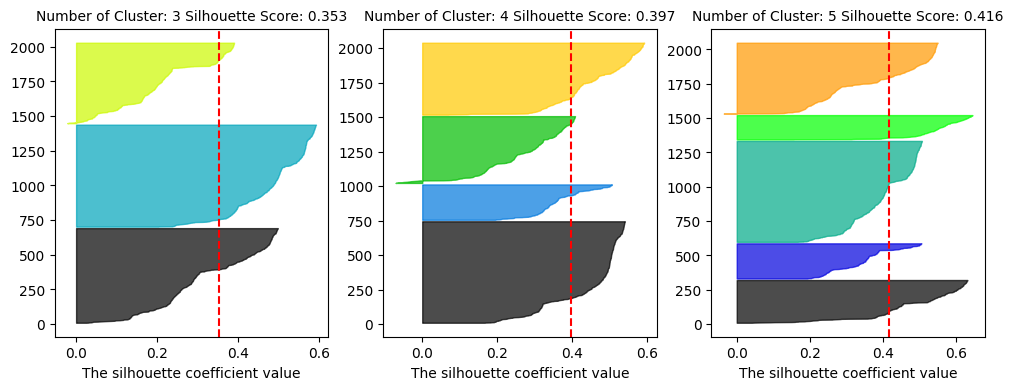

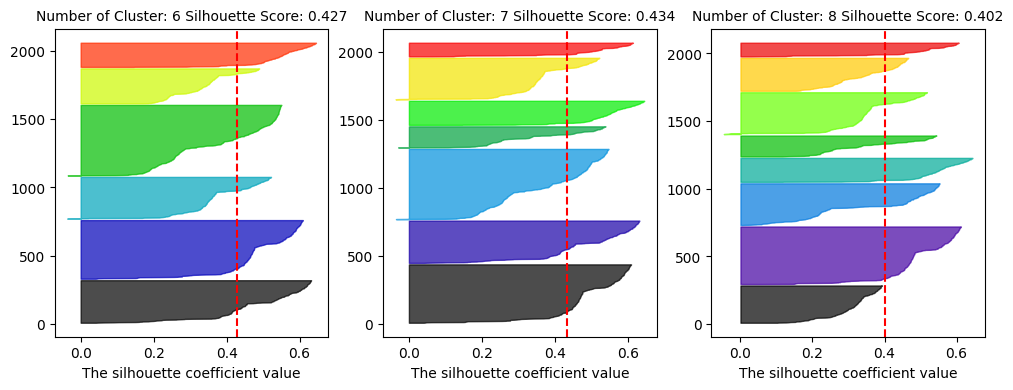

In [26]:
visualize_silhouette('KMeans', [3,4,5], X_features)
visualize_silhouette('KMeans', [6,7,8], X_features)

From the visualizations, I can see that KMeans with <b>7 clusters</b> has the highest average silhouette score, which is <b>0.434</b>, and has the <b>simialr</b> silhouette score for each cluster.

In [27]:
kmeans = KMeans(n_clusters=7, n_init=10, max_iter=500, random_state=0)
kmeans_labels = kmeans.fit_predict(X_features)
df['kmeans_labels'] = kmeans_labels

<div id='3.5' style='background-color:#76BA1B;text-align:center;padding:4px;border-radius:25px'>
    <h3 style='color:white;font-family:Impact'>3.5 Find MeanShift Best Parameters </h3>
</div>

In [28]:
# Find Best Parameters for MeanShift
best_bandwidth = estimate_bandwidth(X_features, quantile=0.1)
print('Best Bandwidth: ', round(best_bandwidth, 3))

Best Bandwidth:  0.66


In [29]:
meanshift = MeanShift(bandwidth=best_bandwidth)
meanshift_labels = meanshift.fit_predict(X_features)
print('MeanShift Labels Type: ', np.unique(meanshift_labels))

df['meanshift_labels'] = meanshift_labels

MeanShift Labels Type:  [0 1 2 3 4]


<div id='3.6' style='background-color:#76BA1B;text-align:center;padding:4px;border-radius:25px'>
    <h3 style='color:white;font-family:Impact'>3.6 Find Gaussian Mixture Best Parameters </h3>
</div>

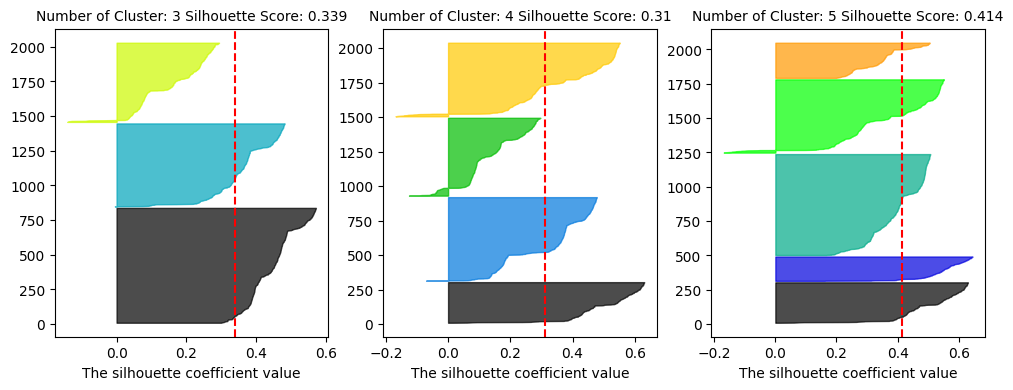

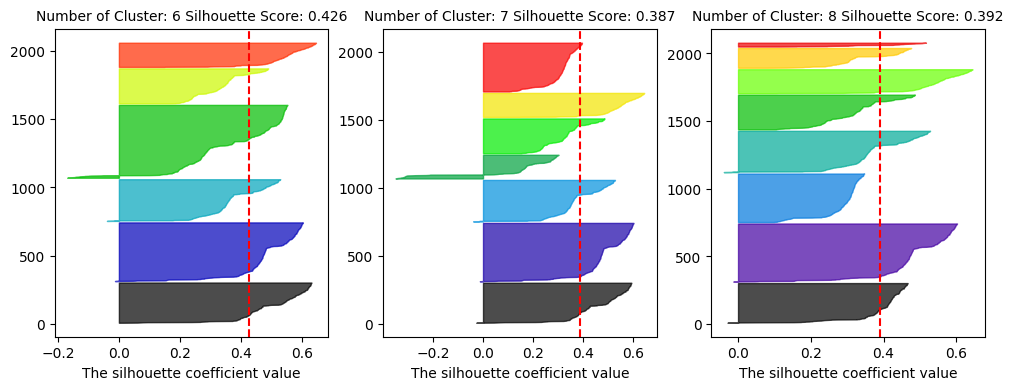

In [30]:
visualize_silhouette('GMM', [3,4,5], X_features)
visualize_silhouette('GMM', [6,7,8], X_features)

From the visualizations, I can see that Gaussian Mixtures Model with <b>6 clusters</b> has the highest average silhouette score, which is <b>0.426</b>, and has the <b>simialr</b> silhouette score for each cluster.

In [31]:
gmm = GaussianMixture(n_components=6, random_state=0).fit(X_features)
gmm_labels = gmm.fit_predict(X_features)
df['gmm_labels'] = gmm_labels

<a id="4"></a>
# <div style="text-align: center; background-color: #4C9A2A; font-family:Impact; color: white; padding: 14px; line-height: 1;border-radius:20px">4. Model Evaluation 🔎</div>

In this section, I will <b>evaluate average silhouette score</b> for each model, then <b>visualize clustering</b> for each model.

In [32]:
models = [df['kmeans_labels'], df['meanshift_labels'], df['gmm_labels']]
scores = [evaluate(model) for model in models]
model_labels = ['KMeans', 'MeanShift', 'GMM']

In [33]:
models_df = pd.Series(scores, index=model_labels, name='scores').sort_values(ascending=True)

fig = px.bar(x=models_df.index, y=models_df.values,
             text=np.round(models_df.values,5),
             color=models_df.values,
             color_continuous_scale='YlGn')

fig.update_traces(marker_line_color='black',
                  marker_line_width=1.5,
                  opacity=0.8)

fig.update_layout(
    title_text='Modelling',
    xaxis=dict(
        title='Model',
        titlefont_size=16
    ),
    yaxis=dict(
        title='Average Silhouette Score',
        titlefont_size=16
    ),
    template='simple_white',
)
fig.show()

From the analysis, <mark>KMeans</mark> has the <b>highest</b> average silhouette score, while <mark>MeanShift</mark> has the <b>lowest</b> average silhouette score.

In [34]:
pca = PCA(n_components=2, random_state=rs_value)
pca_transformed = pca.fit_transform(X_features)

df['ftr1'] = pca_transformed[:, 0]
df['ftr2'] = pca_transformed[:, 1]

In [35]:
def visualize_clusters(model, model_labels):
    fig = px.scatter(df, x='ftr1', y='ftr2', color=model_labels)
    fig.update_layout(
        title_text=f'Scatter Plot on {model} Clustering',
        template='simple_white'
    )
    fig.update_traces(opacity=0.6)
    fig.show()

In [36]:
model_names = ['Kmeans', 'MeanShift', 'GMM']
cluster_models = ['kmeans_labels', 'meanshift_labels', 'gmm_labels']
for i in range(len(cluster_models)):
    visualize_clusters(model_names[i], cluster_models[i])

From the clustering visualizations, I can clearly see that <mark>KMeans</mark> performs the best as clusters do <b>NOT overlap</b> with each other. Meanwhile, <mark>MeanShift and GMM</mark> clusters <b>overlap</b> with each other.

<a id="5"></a>
# <div style="text-align: center; background-color: #4C9A2A; font-family:Impact; color: white; padding: 14px; line-height: 1;border-radius:20px">5. Further Analysis 👀</div>

In this section, I will evaluate each <mark>KMeans cluster</mark> to see what <b>characteristics</b> each cluster has as KMeans cluster performas the best compared to other models.  

<div id='5.1' style='background-color:#76BA1B;text-align:center;padding:4px;border-radius:25px'>
    <h3 style='color:white;font-family:Impact'>5.1 General Functions Needed for Further Analysis </h3>
</div>

Functions:
- <mark><b>visualize_categorical_vars: </b></mark>This function returns the visualizations of categorical variables given dataframe
- <mark><b>visualize_continuous_vars: </b></mark>This function returns the visualizations of continuous variables given datafram

In [37]:
def visualize_categorical_vars(df):

    sex_counts = df['Sex'].value_counts().sort_values(ascending=True)
    marital_counts = df['Marital status'].value_counts().sort_values(ascending=True)
    education_counts = df['Education'].value_counts().sort_values(ascending=True)
    occupation_counts = df['Occupation'].value_counts().sort_values(ascending=True)
    settlement_counts = df['Settlement size'].value_counts().sort_values(ascending=True)
    categorical_lst = [sex_counts, marital_counts, education_counts, occupation_counts, settlement_counts]
    categorical_labels = ['Sex', 'Marital Status', 'Education', 'Occupation', 'Settlement Size']

    row_n=3
    col_n=2

    fig = make_subplots(rows=row_n, cols=col_n)

    for i, col in enumerate(categorical_labels):
        fig.add_trace(
            go.Bar(
                x=categorical_lst[i].index.astype('str'),
                y=categorical_lst[i].values,
                name=col,
                text=np.round(categorical_lst[i].values,3),
                textposition='inside',
                marker_color=px.colors.sequential.Emrld,
                textfont=dict(size=10)),
            row=int(i/col_n)+1, col=int(i%col_n)+1
            )

    fig.update_layout(
        height=800,
        title_text="Categorical Variable Distribution",
        template='simple_white')
    fig.update_traces(marker_line_color='black',
                      marker_line_width=1.5,
                      opacity=0.8)
    fig.show()

In [38]:
def visualize_continuous_vars(df):
    fig = make_subplots(rows=2, cols=2)

    fig.add_trace(
        go.Histogram(x=df['Age'], name='Age Histogram', marker_color='darkgreen'),
        row=1, col=1
    )

    fig.add_trace(
        go.Box(y=df['Age'], name='Age Box Plot', marker_color='darkgreen'),
        row=1, col=2
    )

    fig.add_trace(
        go.Histogram(x=df['Income'], name='Income Histogram', marker_color='seagreen'),
        row=2, col=1
    )

    fig.add_trace(
        go.Box(y=df['Income'], name='Income Box Plot', marker_color='seagreen'),
        row=2, col=2
    )

    fig.update_layout(
        title_text='Continuous Variable Distribution',
        template='simple_white')
    fig.update_traces(
        marker_line_color='black',
        marker_line_width=1.5,
        opacity=0.8)
    fig.show()

In [39]:
df = df.iloc[:,:7]
df['kmeans_labels'] = kmeans_labels
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,kmeans_labels
0,0,0,67,2,124670,1,2,2
1,1,1,22,1,150773,1,2,5
2,0,0,49,1,89210,0,0,1
3,0,0,45,1,171565,1,1,2
4,0,0,53,1,149031,1,1,2


<div id='5.2' style='background-color:#76BA1B;text-align:center;padding:4px;border-radius:25px'>
    <h3 style='color:white;font-family:Impact'>5.2 Evaluate Each Cluster </h3>
</div>

<div id='5.2.1' style='background-color:#6EBD6D;padding:2px;border-radius:25px'>
    <h4 style='font-family:Impact; color:white'>&nbsp 5.2.1 Cluster 0</h4>
</div>

In [40]:
cluster_zero = df.loc[df['kmeans_labels']==0]
cluster_zero = create_temp_df(cluster_zero)
visualize_categorical_vars(cluster_zero)
visualize_continuous_vars(cluster_zero)

People who are labelled as <b>cluster 0</b> has the follwing characteristics: <br>
- female
- non-single
- education level at high school
- unskilled employee
- residing in small city
- mostly aged at 26-27
- earning income around 102-103k

<div id='5.2.2' style='background-color:#6EBD6D;padding:2px;border-radius:25px'>
    <h4 style='font-family:Impact; color:white'>&nbsp 5.2.2 Cluster 1</h4>
</div>

In [41]:
cluster_one = df.loc[df['kmeans_labels']==1]
cluster_one = create_temp_df(cluster_one)
visualize_categorical_vars(cluster_one)
visualize_continuous_vars(cluster_one)

People who are labelled as <b>cluster 1</b> has the follwing characteristics: <br>
- male
- single
- education level at high school
- unskilled employee
- residing in small city
- mostly aged at 35-39
- earning income around 102-104k

<div id='5.2.3' style='background-color:#6EBD6D;padding:2px;border-radius:25px'>
    <h4 style='font-family:Impact; color:white'>&nbsp 5.2.3 Cluster 2</h4>
</div>

In [42]:
cluster_two = df.loc[df['kmeans_labels']==2]
cluster_two = create_temp_df(cluster_two)
visualize_categorical_vars(cluster_two)
visualize_continuous_vars(cluster_two)

People who are labelled as <b>cluster 2</b> has the follwing characteristics: <br>
- male
- single
- education level at high school
- skilled employee
- residing in big city
- mostly aged at 35-39
- earning income around 134-140k

<div id='5.2.4' style='background-color:#6EBD6D;padding:2px;border-radius:25px'>
    <h4 style='font-family:Impact; color:white'>&nbsp 5.2.4 Cluster 3</h4>
</div>

In [43]:
cluster_three = df.loc[df['kmeans_labels']==3]
cluster_three = create_temp_df(cluster_three)
visualize_categorical_vars(cluster_three)
visualize_continuous_vars(cluster_three)

People who are labelled as <b>cluster 3</b> has the follwing characteristics: <br>
- male
- non-single
- education level at high school
- skilled employee
- residing in mid-sized and big city
- mostly aged at 25-29
- earning income around 125-133k

<div id='5.2.5' style='background-color:#6EBD6D;padding:2px;border-radius:25px'>
    <h4 style='font-family:Impact; color:white'>&nbsp 5.2.5 Cluster 4</h4>
</div>

In [44]:
cluster_four = df.loc[df['kmeans_labels']==4]
cluster_four = create_temp_df(cluster_four)
visualize_categorical_vars(cluster_four)
visualize_continuous_vars(cluster_four)

 People who are labelled as <b>cluster 4</b> has the follwing characteristics: <br>
- female
- single
- education level at high school
- unskilled employee
- residing in small city
- mostly aged at 35-39
- earning income around 95-106k

<div id='5.2.6' style='background-color:#6EBD6D;padding:2px;border-radius:25px'>
    <h4 style='font-family:Impact; color:white'>&nbsp 5.2.6 Cluster 5</h4>
</div>

In [45]:
cluster_five = df.loc[df['kmeans_labels']==5]
cluster_five = create_temp_df(cluster_five)
visualize_categorical_vars(cluster_five)
visualize_continuous_vars(cluster_five)

 People who are labelled as <b>cluster 5</b> has the follwing characteristics: <br>
- female
- non-single
- education level at high school
- skilled employee
- residing in mid-sized city
- mostly aged at 25-29
- earning income around 121-130k

<div id='5.2.7' style='background-color:#6EBD6D;padding:2px;border-radius:25px'>
    <h4 style='font-family:Impact; color:white'>&nbsp 5.2.7 Cluster 6</h4>
</div>

In [46]:
cluster_six = df.loc[df['kmeans_labels']==6]
cluster_six = create_temp_df(cluster_six)
visualize_categorical_vars(cluster_six)
visualize_continuous_vars(cluster_six)

 People who are labelled as <b>cluster 6</b> has the follwing characteristics: <br>
- male
- non-single
- education level at high school
- unskilled employee
- residing in small city
- mostly aged at 25-29
- earning income around 90-100k

<div id='5.2.8' style='background-color:#6EBD6D;padding:2px;border-radius:25px'>
    <h4 style='font-family:Impact; color:white'>&nbsp 5.2.8 Conclusion on Further Analysis</h4>
</div>

<table>
  <tr>
      <th></th>
    <th>Cluster_0</th>
    <th>Cluster_1</th>
    <th>Cluster_2</th>
    <th>Cluster_3</th>
    <th>Cluster_4</th>
    <th>Cluster_5</th>
    <th>Cluster_6</th>
  </tr>
  <tr>
    <th>Sex</th>
    <td>Female</td>
    <td>Male</td>
    <td>Male</td>
    <td>Male</td>
    <td>Female</td>
    <td>Female</td>
    <td>Male</td>
  </tr>
  <tr>
    <th>Marital Status</th>
    <td>Non-Single</td>
    <td>Single</td>
    <td>Single</td>
    <td>Non-Single</td>
    <td>Single</td>
    <td>Non-Single</td>
    <td>Non-Single</td>
  </tr>
  <tr>
    <th>Average Age</th>
    <td>32</td>
    <td>38</td>
    <td>40</td>
    <td>35</td>
    <td>35</td>
    <td>34</td>
    <td>32</td>
  </tr>
  <tr>
    <th>Education</th>
    <td>High School/University</td>
    <td>High School/Other/Unknown</td>
    <td>High School/Other/Unknown</td>
    <td>High School/University</td>
    <td>High School/Ohter/Unknown</td>
    <td>High School/University</td>
    <td>High School/University</td>
  </tr>
  <tr>
    <th>Average Income</th>
    <td>102.1K</td>
    <td>102.5K</td>
    <td>145.4K</td>
    <td>137.1K</td>
    <td>97.9K</td>
    <td>136.5K</td>
    <td>101.2K</td>
  </tr>
  <tr>
    <th>Occupation Employee</th>
    <td>Unskilled Employee</td>
    <td>Unskilled Employee</td>
    <td>Skilled Employee</td>
    <td>Skilled Employee</td>
    <td>Unskilled Employee</td>
    <td>Skilled Employee</td>
    <td>Unskilled Employee</td>
  </tr>
  <tr>
    <th>Small City</th>
    <td>Small City</td>
    <td>Big City</td>
    <td>Big City</td>
    <td>Small City</td>
    <td>Mid-sized City</td>
    <td>Big City</td>
    <td>Small City</td>
  </tr>
</table>